### Importing Library

In [3]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


In [4]:
import pandas as pd

# Loading CSV
df = pd.read_csv('./clean_diabetes.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
486,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
487,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
488,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Pycaret

In [5]:
from pycaret.classification import *
s = setup(data=df, target='class')

,Description,Value
0,Session id,3078
1,Target,class
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(490, 17)"
5,Transformed data shape,"(490, 17)"
6,Transformed train set shape,"(343, 17)"
7,Transformed test set shape,"(147, 17)"
8,Ordinal features,15
9,Numeric features,1


In [ ]:
#compare_models()
# models()

In [6]:
# model selection
best = compare_models(include=['rf', 'gbc', 'lr', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9680,0.9982,0.9669,0.9814,0.9736,0.9328,0.9342,1.4570
xgboost,Extreme Gradient Boosting,0.9621,0.9851,0.9526,0.9859,0.9681,0.9214,0.9244,0.8150
gbc,Gradient Boosting Classifier,0.9445,0.9813,0.9431,0.9668,0.9543,0.8833,0.8850,0.9570
lr,Logistic Regression,0.9213,0.9696,0.9195,0.9542,0.9347,0.8353,0.8408,0.8030


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [9]:
%%time

# Create model, tune the model, finalize the model
rf = create_model('rf')
t_rf = tune_model(rf)
f_rf = finalize_model(t_rf)
f_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.9965,0.9545,0.9545,0.9545,0.8776,0.8776
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9429,0.9966,0.9048,1.0000,0.9500,0.8837,0.8898
3,0.9412,0.9927,0.9524,0.9524,0.9524,0.8755,0.8755
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9706,1.0000,1.0000,0.9545,0.9767,0.9368,0.9387
6,0.9412,1.0000,0.9048,1.0000,0.9500,0.8790,0.8855
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9412,0.9963,0.9524,0.9524,0.9524,0.8755,0.8755


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9930,0.9091,0.9524,0.9302,0.8193,0.8208
1,0.9714,1.0000,0.9524,1.0000,0.9756,0.9412,0.9428
2,0.9429,1.0000,0.9048,1.0000,0.9500,0.8837,0.8898
3,0.9118,0.9744,0.9524,0.9091,0.9302,0.8104,0.8120
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9706,1.0000,1.0000,0.9545,0.9767,0.9368,0.9387
6,0.9118,0.9927,0.9048,0.9500,0.9268,0.8159,0.8174
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9118,0.9927,0.8571,1.0000,0.9231,0.8211,0.8345


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Wall time: 2min 10s


Pipeline(memory=FastMemory(location=C:\Users\heinr\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=F...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=3078,
                                        verbose=0, warm_start=False))],
         verbose=False)

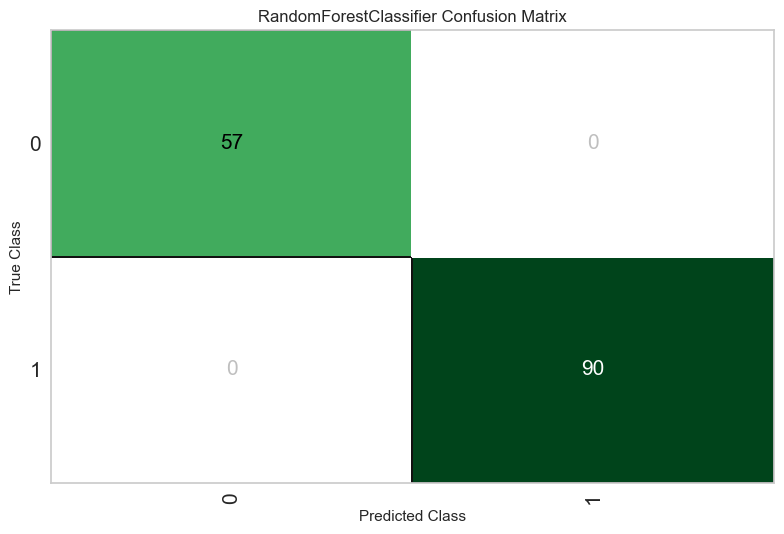

In [10]:
plot_model(f_rf, plot='confusion_matrix')

In [ ]:
%%time

# Create model, tune the model, finalize the model
gbc = create_model('gbc')
t_gbc = tune_model(gbc)
f_gbc = finalize_model(t_gbc)
f_gbc

In [ ]:
%%time

# Create model, tune the model, finalize the model
lr = create_model('lr')
t_lr = tune_model(lr)
f_lr = finalize_model(t_lr)
f_lr

In [ ]:
%%time

# Create model, tune the model, finalize the model
xgb = create_model('xgboost')
t_xgb = tune_model(xgb)
f_xgb = finalize_model(t_xgb)
f_xgb

## Yellowbrick

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

models = [
    RandomForestClassifier(n_jobs=-1),
    GradientBoostingClassifier(learning_rate=0.2, max_depth=10, max_features='log2',
                           min_impurity_decrease=0.0002, min_samples_leaf=3,
                           min_samples_split=5, n_estimators=70, subsample=0.85),
    LogisticRegression(C=6.165, class_weight={}, max_iter=1000),
    XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None,monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    #print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(f"{estimator.__class__.__name__}:\n Accuracy:{accuracy_score(expected, predicted)*100:.3f} %\n"
          f" Precision: {precision_score(expected, predicted, average='weighted', zero_division=True)*100:.3f} %\n"
          f" F1: {f1_score(expected, predicted, average='weighted')*100:.3f} %\n")

for model in models:
    score_model(X, y, model)

RandomForestClassifier:
 Accuracy:100.000 %
 Precision: 100.000 %
 F1: 100.000 %

GradientBoostingClassifier:
 Accuracy:100.000 %
 Precision: 100.000 %
 F1: 100.000 %

LogisticRegression:
 Accuracy:97.551 %
 Precision: 97.595 %
 F1: 97.558 %

XGBClassifier:
 Accuracy:99.796 %
 Precision: 99.797 %
 F1: 99.796 %

